In [5]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller

In [6]:
# example data frame
df = pd.DataFrame()

In [ ]:
# changing an index to datetime
df.index = pd.to_datetime(df.index)

# Plotting data
df.plot()

# Joining dataframes
df1.join(df2)

# Resampling data 
df = df.resample(rule='W', how='last')

# Computing percent changes and differences of a time series
df['col'].pct_change()
df['col'].diff() # .diff(n)

# pandas correlation method of Series
correlation = df['ABC'].corr(df['XYZ'])

# autocorrelation
df['ABC'].autocorr()

# Plot correlation
plt.scatter(df['col1'], df['col2'])
plt.show()

In [ ]:
# Linear Regressions

# statsmodels
import statsmodels.api as sm
sm.OLS(y, x).fit()

# numpy
import numpy as np
np.polyfit(x, y, deg=1)

# pandas
import pandas as pd
pd.ols(y, x)

# scipy
from scipy import stats
stats.linregress(x, y)

In [ ]:
# Autocorrelation Function
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(x, lags=20, alpha=0.05) # alpha - width of confidence interval +-2/sqtr(N) ~ 95%

from statsmodels.tsa.stattools import acf
print(acf(x))

In [9]:
# Augumented Dickey-Fuller test
from statsmodels.tsa.stattools import adfuller
ad = adfuller(x)
# if ad ~ 0 => then x is a random walk, if ad < 0 => then x is not a random walk

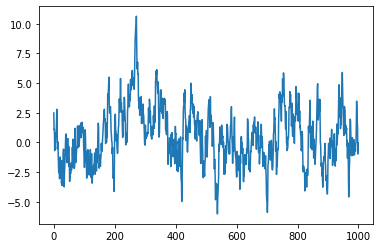

In [12]:
# AR Model
# -1 < fi < 1 => stationarity
# fi < 0 => Mean Reversion
# fi > 0 => Momentum

# Simulating an AR Process
import numpy as np
from statsmodels.tsa.arima_process import ArmaProcess
ar = np.array([1, -0.9])
ma = np.array([1])
AR_object = ArmaProcess(ar, ma)
simulated_data = AR_object.generate_sample(nsample=1000)
plt.plot(simulated_data)

In [16]:
# Estimating an AR Model
from statsmodels.tsa.arima_model import ARMA
mod = ARMA(simulated_data, order=(1,0))
result = mod.fit()
print(result.summary())
# print(result.params)

                              ARMA Model Results                              
Dep. Variable:                      y   No. Observations:                 1000
Model:                     ARMA(1, 0)   Log Likelihood               -1430.625
Method:                       css-mle   S.D. of innovations              1.011
Date:                Tue, 09 Jun 2020   AIC                           2867.251
Time:                        21:24:36   BIC                           2881.974
Sample:                             0   HQIC                          2872.847
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.5048      0.327      1.544      0.123      -0.136       1.146
ar.L1.y        0.9031      0.013     66.987      0.000       0.877       0.930
                                    Roots           

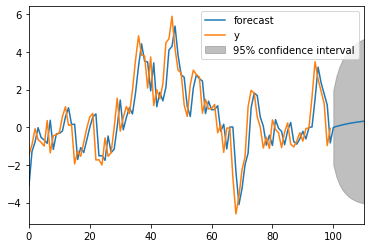

In [23]:
# Forecasting an AR Model
from statsmodels.tsa.arima_model import ARMA
mod = ARMA(simulated_data, order=(1,0))
result = mod.fit()
result.plot_predict(start=900, end=1010)
plt.show()